## Trabalho de Microeconomia
Otimizar lucro no leilão selado de primeiro preço

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import palettable
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

import snowflake.connector
from sqlalchemy import create_engine

In [28]:
# Show all Columns and Rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 10)

import matplotlib.style
import matplotlib as mpl
for m,n in zip(['grid.color','axes.titlecolor','axes.labelcolor','xtick.color','ytick.color','axes.titlesize',
    'figure.figsize','legend.framealpha'],['white','white','white','white','white','20.0','13.0, 8.0','0.8']):
    mpl.rcParams[m] = n

cmap = palettable.scientific.sequential.LaJolla_5.hex_colors

In [3]:
custos = pd.read_excel('/Users/pedrocerbino/Downloads/custos_g7.xlsx',index_col=0)

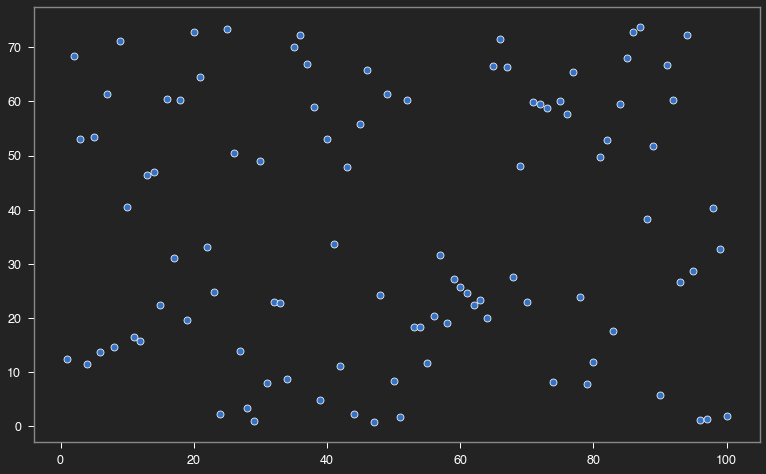

In [23]:
sns.scatterplot(x=list(range(1,101)),y=custos.custos.values);

In [4]:
custos.describe()

,custos
count,100.000000
mean,36.717000
std,23.802101
min,0.800000
25%,16.300000
50%,32.250000
75%,59.950000
max,73.800000


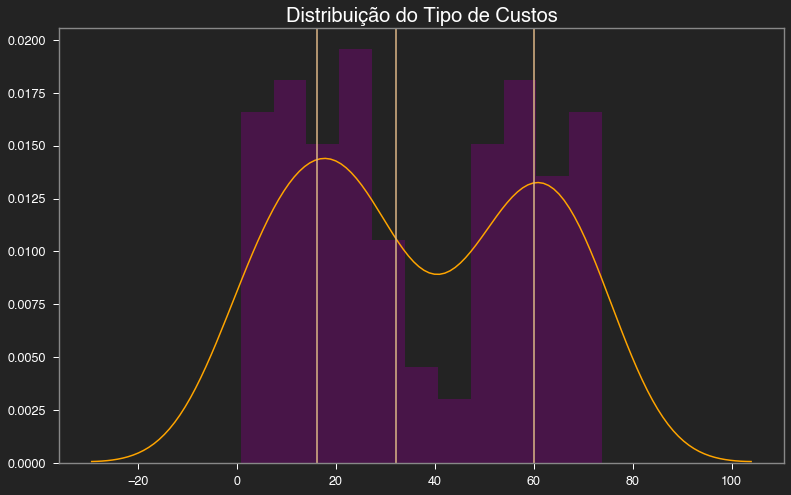

In [5]:
sns.distplot(custos, bins=11, color='purple', kde_kws={"color":"orange"})
quantile = np.quantile(custos,[0.25,0.5,0.75])
plt.axvline(x=quantile[0],color='burlywood')
plt.axvline(x=quantile[1],color='burlywood')
plt.axvline(x=quantile[2],color='burlywood')
plt.xlabel('')
plt.title('Distribuição do Tipo de Custos');

In [6]:
a=custos.copy()
a.custos.values

array([12.4, 68.4, 53.1, 11.5, 53.5, 13.8, 61.4, 14.6, 71.1, 40.5, 16.5,
       15.7, 46.5, 46.9, 22.4, 60.4, 31. , 60.2, 19.6, 72.8, 64.6, 33.2,
       24.8,  2.2, 73.3, 50.4, 14. ,  3.3,  1. , 49. ,  8. , 22.9, 22.8,
        8.7, 70.1, 72.3, 66.9, 58.9,  4.8, 53.1, 33.7, 11.2, 47.9,  2.2,
       55.8, 65.8,  0.8, 24.2, 61.3,  8.3,  1.8, 60.3, 18.4, 18.4, 11.7,
       20.4, 31.7, 19.1, 27.2, 25.8, 24.6, 22.4, 23.3, 20. , 66.6, 71.6,
       66.4, 27.6, 48. , 23. , 59.9, 59.6, 58.8,  8.2, 60.1, 57.7, 65.5,
       23.9,  7.9, 11.9, 49.8, 52.8, 17.6, 59.6, 68. , 72.9, 73.8, 38.2,
       51.8,  5.7, 66.7, 60.2, 26.6, 72.2, 28.6,  1.2,  1.4, 40.3, 32.8,
        1.9])

In [7]:
a.values/a.values.sum() # point estimates for p = x/n

array([[0.00337718],
       [0.01862897],
       [0.01446197],
       [0.00313206],
       [0.01457091],
       [0.00375848],
       [0.0167225 ],
       [0.00397636],
       [0.01936433],
       [0.01103031],
       [0.00449383],
       [0.00427595],
       [0.01266443],
       [0.01277337],
       [0.00610072],
       [0.01645015],
       [0.00844296],
       [0.01639568],
       [0.00533813],
       [0.01982733],
       [0.01759403],
       [0.00904213],
       [0.00675436],
       [0.00059918],
       [0.0199635 ],
       [0.01372661],
       [0.00381295],
       [0.00089877],
       [0.00027235],
       [0.01334532],
       [0.00217883],
       [0.00623689],
       [0.00620966],
       [0.00236947],
       [0.01909197],
       [0.01969115],
       [0.01822044],
       [0.01604162],
       [0.0013073 ],
       [0.01446197],
       [0.00917831],
       [0.00305036],
       [0.01304573],
       [0.00059918],
       [0.01519732],
       [0.01792085],
       [0.00021788],
       [0.006

In [14]:
import pandas as pd
import numpy as np
import scipy.optimize as sciopt

# bounds for parameters to lie between (0,1), 
# absolute zero (0) for lower bound avoided as log takes an infinite value 
bnds = [(0.001e-12,1) for i in range(100)]

# Initializing parameters value for optimization
init_parameters = np.asarray([0.1 for i in range(100)])

# Negative Log Likelihood Function
neg_log_lik = lambda p: -np.sum([a.values[i]*np.log(p[i]) for i in range(100)])

# Constraint sum(p) = 1
cons = {'type': 'eq', 'fun': lambda p:  (sum([p[i] for i in range(100)]) - 1) }

# Minimizing neg_log_lik
results = sciopt.minimize(neg_log_lik, x0 = init_parameters, 
                          method='SLSQP', bounds= bnds, constraints= cons)

results.x # point estimates for p

array([0.00932656, 0.00849799, 0.02356739, 0.00316615, 0.0106116 ,
       0.00365593, 0.01704794, 0.01701763, 0.05181011, 0.00645365,
       0.0048365 , 0.00549007, 0.01194144, 0.00737558, 0.00984602,
       0.01950592, 0.00525289, 0.01530096, 0.00501215, 0.0146059 ,
       0.00972642, 0.01513185, 0.00374424, 0.00078162, 0.01208404,
       0.00948803, 0.00518233, 0.00070273, 0.00086105, 0.00665069,
       0.00267115, 0.00586897, 0.00516084, 0.01032057, 0.00885344,
       0.01491123, 0.02061614, 0.0185574 , 0.00301135, 0.03050659,
       0.00759923, 0.00326253, 0.0121906 , 0.00078162, 0.00962407,
       0.00882497, 0.0008735 , 0.00429886, 0.02156676, 0.00931124,
       0.00080909, 0.03280762, 0.00600418, 0.00599885, 0.00520451,
       0.00462128, 0.00574673, 0.00983392, 0.00875341, 0.0045652 ,
       0.00858802, 0.00984852, 0.0143349 , 0.00554297, 0.04545999,
       0.00950175, 0.02127408, 0.00520777, 0.01004928, 0.00515249,
       0.02592768, 0.00994442, 0.00790939, 0.00973304, 0.03201

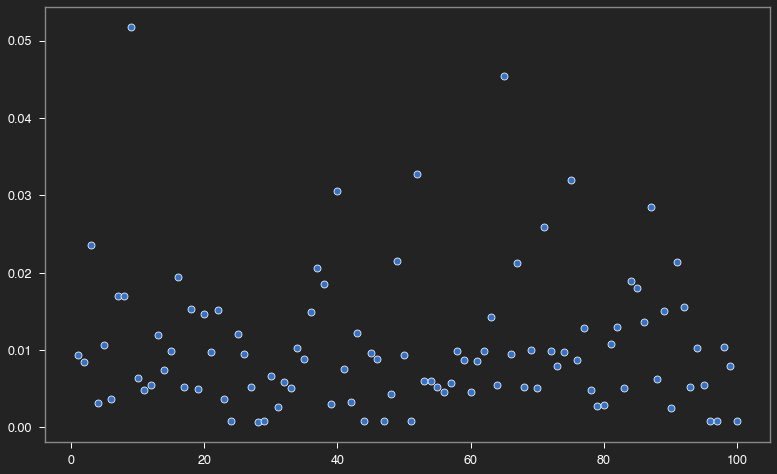

In [24]:
sns.scatterplot(x=list(range(1,101)),y=results.x);

<AxesSubplot:>

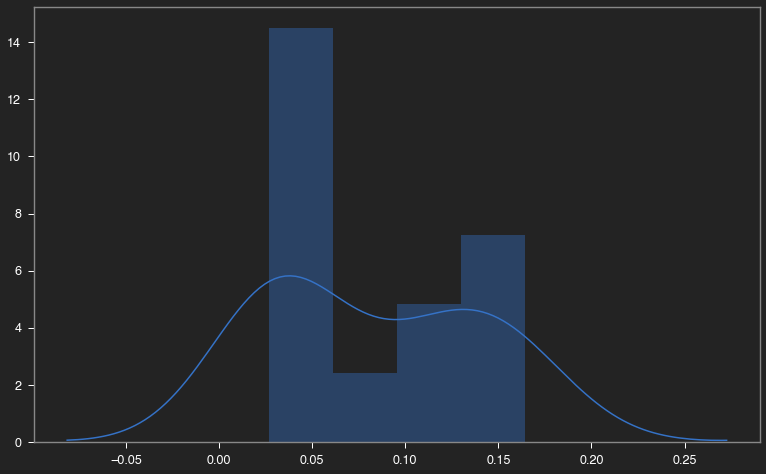

In [11]:
sns.distplot(results.x,bins=4);
# plt.xticks(np.arange(-40, 140, 20))

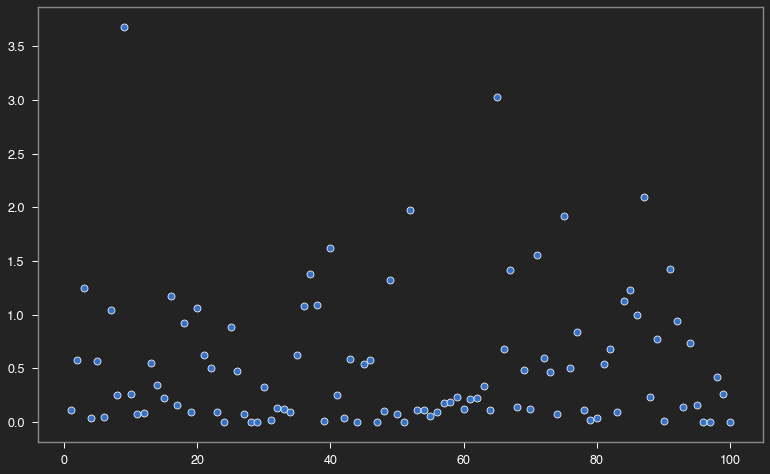

In [21]:
sns.scatterplot(x=list(range(1,101)),y=np.multiply(results.x,custos.custos.values));

In [72]:
import warnings
import scipy.stats as st

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
#     DISTRIBUTIONS = [        
#         st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
#         st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
#         st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
#         st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
#         st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
#         st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
#         st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
#         st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
#         st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
#         st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
#     ]
    
    DISTRIBUTIONS = [st.dweibull]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse
                    print(best_distribution.name)

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

dweibull


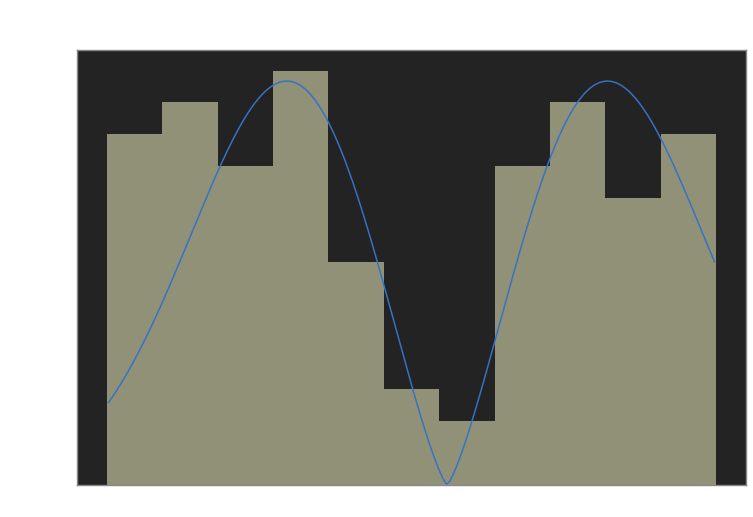

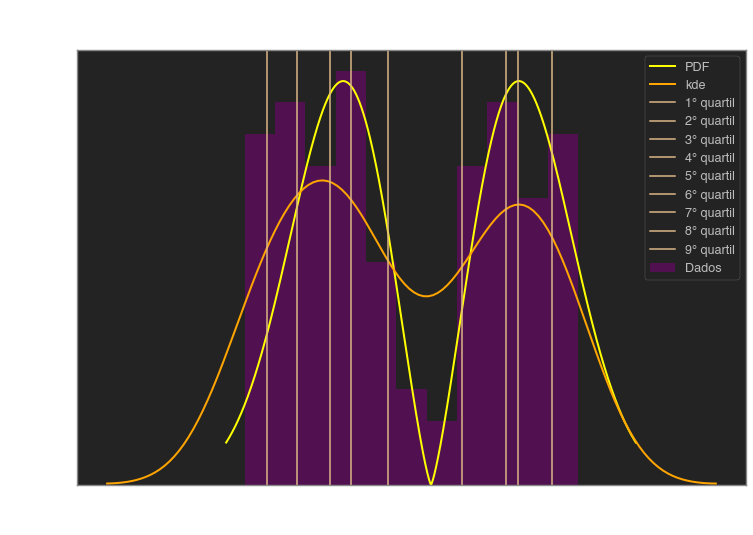

In [89]:
# Get data and palette
data = custos.custos
cmap = palettable.scientific.sequential.LaJolla_20.hex_colors

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=11, density=True, alpha=0.5, color=cmap)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Custos dos Produtos.\n All Fitted Distributions')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True, color='yellow')
data.plot(kind='hist', bins=11, density=True, alpha=0.5, label='Dados', legend=True, ax=ax, color='purple')

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Custos dos Produtos \n' + dist_str)
ax.set_ylabel('Frequency')

sns.distplot(custos.custos, kde_kws={"color":"orange",'lw':2}, hist=False, label='kde')
# quantile = np.quantile(custos,[0.25,0.5,0.75])
# for i in range(1,4)
#     plt.axvline(x=quantile[i-1],color='burlywood',label=str(i)+'° quartil')
quantile = np.quantile(custos,[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
for i in range(1,10):
    plt.axvline(x=quantile[i-1],color='burlywood',label=str(i)+'° quartil')
plt.legend()
plt.xlabel('Preço');

[distfit] >fit..
[distfit] >transform..
[smoothline] >Smoothing by interpolation..
[distfit] >[norm      ] [RSS: 0.0021233] [loc=36.717 scale=23.683] 
[distfit] >[expon     ] [RSS: 0.0028129] [loc=0.800 scale=35.917] 
[distfit] >[pareto    ] [RSS: 0.0189228] [loc=-1.841 scale=2.641] 
[distfit] >[dweibull  ] [RSS: 0.0004571] [loc=41.568 scale=24.705] 
[distfit] >[t         ] [RSS: 0.0021234] [loc=36.719 scale=23.682] 
[distfit] >[genextreme] [RSS: 0.0020300] [loc=31.641 scale=26.396] 
[distfit] >[gamma     ] [RSS: 0.0021089] [loc=-564.796 scale=0.930] 
[distfit] >[lognorm   ] [RSS: 0.0242632] [loc=0.800 scale=1.513] 
[distfit] >[beta      ] [RSS: 0.0017782] [loc=-6.337 scale=80.137] 
[distfit] >[uniform   ] [RSS: 0.0009153] [loc=0.800 scale=73.000] 
[distfit] >Compute confidence interval [parametric]
{'distr': <scipy.stats._continuous_distns.dweibull_gen object at 0x7f845bb68ad0>, 'params': (2.289766082144454, 41.567993966684035, 24.70544457263186), 'name': 'dweibull', 'RSS': 0.00045706

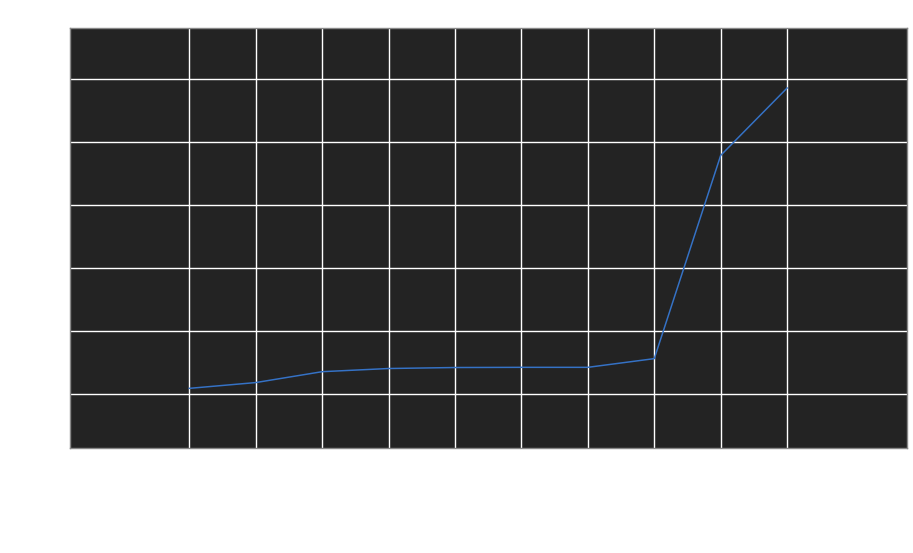

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: dweibull'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [51]:
# Get values
X = custos.custos.values

# Retrieve P-value for y
y = [0,10,45,55,100]

# From the distfit library import the class distfit
from distfit import distfit

# Initialize.
# Set any properties here, such as alpha.
# The smoothing can be of use when working with integers. Otherwise your histogram
# may be jumping up-and-down, and getting the correct fit may be harder.
dist = distfit(alpha=0.05, smooth=10)

# Search for best theoretical fit on your empirical data
dist.fit_transform(X)

# Best fitted model
best_distr = dist.model
print(best_distr)

# Ranking distributions
dist.summary

# Plot the summary of fitted distributions
dist.plot_summary();